# Solution - Spring pendulum

We plan to use `numpy` and `matplotlib` for this project, so we'll import them straight away.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Since we want to perform a simulation, we'll put the parameters of the simulation, including constants and initial conditions, at the top. We can change these later to adjust how the simulation behaves:

In [43]:
# define our constants
k = 100
r_0 = 2.0
g = 9.81
m = 5.0

# gravitational force does not change, so we treat
# it as a constant
F_g = np.array([0.0, -m*g])

# define our choice of timestep
dt = .001
N = 10000

# define our starting position and velocity
r = np.array([2.0, -2.0])
v = np.array([4.0, -3.0])

We'll break down what we need to calculate for each iteration of our loop into individual functions. Doing this serves a few purposes:
1. It breaks the complexity of what we're doing into manageable pieces, so we can focus on getting those pieces right one at a time.
2. It will make the simulation loop much easier to write and understand, since the complexity of each step is abstracted away.

First, we'll write a function that can take a vector (in fact, *any* vector), and return the length of that vector:

In [44]:
def get_vector_length(vec):
    return np.sqrt((vec**2).sum())

We need a function that calculates the force of the spring given `r`, `k`, and `r_0`. Although each of these would be accessible to the function without being explicit arguments, it's a wise choice to write functions that depend *only* on their arguments, and not on the environment in which they are executed. So, we'll write our function to take as inputs every value it needs for the calculation it performs:

In [45]:
def calculate_spring_force(r, k, r_0):
    r_mag = get_vector_length(r)
    
    return -k * (r_mag - r_0) * r/r_mag

Finally, we'll write the functions that give the new velocity and position of the ball:

In [46]:
def new_velocity(v, F, m, dt):
    return v + F*dt/m

In [47]:
def new_position(r, v, dt):
    return r + v*dt

We can now take these functions and use them to write our loop:

In [48]:
positions = []

for i in range(N):
    
    # calculate spring force, which depends on ball position
    F_s = calculate_spring_force(r, k, r_0)
    
    # calculate net force on the ball
    F = F_s + F_g
    
    # update velocity, position
    v = new_velocity(v, F, m, dt)
    r = new_position(r, v, dt)
    
    # add new position to a running list
    positions.append(r)

This gives us a list of `numpy` arrays, each giving the position of the ball at some point along its trajectory. We can turn this into a single `numpy` array with `np.vstack`:

In [49]:
positions = np.vstack(positions)

In [51]:
positions

array([[ 2.00398828, -2.00299809],
       [ 2.00796478, -2.00599422],
       [ 2.01192941, -2.0089883 ],
       ...,
       [ 2.21211713, -1.92115826],
       [ 2.20825152, -1.91893368],
       [ 2.20437193, -1.91670677]])

In this form, we can slice out the zeroth column to give the x-positions with time, and the oneth column to give the y-positions with time. We'll plot these against each other to get a view of the trajectory the ball took:

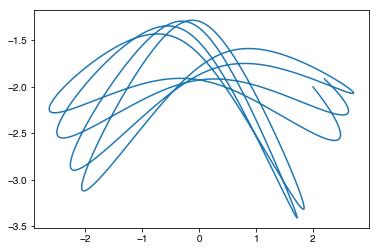

In [52]:
plt.plot(positions[:,0],
         positions[:,1])

## Running in 3 dimensions

We built our simulation above for the 2-dimensional case; that is, our pendulum only swung in a vertical plane. It turns out that we could change the initial position and velocity to be 3-dimensional, as well as the gravitational force, and the simulation would also work given the way we wrote the code above. To make the whole thing a good deal cleaner, let's put the loop into a function all its own, and make the parameters of the simulation parameters of this function. We'll also return the array of positions at the end.

In [59]:
def run_simulation(r, v, N=10000, dt=.001, k=100, r_0=2.0, g=9.81, m=5.0):
    """Run a spring pendulum simulation.
    
    Parameters
    ----------
    r : np.array
        Array of shape (n,) giving the initial position of the ball,
        where `n` is the dimensionality of the simulation.
    v : np.array
        Array of shape (n,) giving the initial velocity of the ball,
        where `n` is the dimensionality of the simulation.
    N : int
        Number of iterations to simulate for.
    dt : float
        Integration timestep.
    k : float
        Spring constant.
    r_0 : float
        Neutral length of spring.
    g : float
        Acceleration due to gravity.
    m : float
        Mass of ball.
        
    Returns
    -------
    positions : np.array
        Array of shape (N, n), giving the position of the ball with 
        each iteration as rows.
    
    """

    positions = []
    
    # set gravitational force to constant downward force
    F_g = np.zeros(len(r))
    F_g[-1] = -m*g

    for i in range(N):

        # calculate spring force, which depends on ball position
        F_s = calculate_spring_force(r, k, r_0)

        # calculate net force on the ball
        F = F_s + F_g

        # update velocity, position
        v = new_velocity(v, F, m, dt)
        r = new_position(r, v, dt)

        # add new position to a running list
        positions.append(r)

    return np.vstack(positions)

Now we can run with our choice of starting position, starting velocity as:

In [60]:
positions = run_simulation(np.array([2.0, 2.0, -2.0]),
                           np.array([4.0, -3.0, 0.0]))

And we could plot the trajectory in 3 dimensions with, e.g. `mpl_toolkits`:

Text(0.5,0,'$z$')

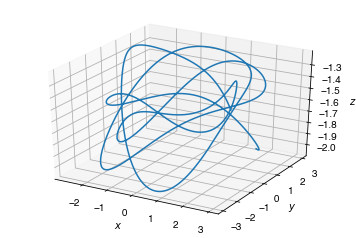

In [61]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = positions.transpose()
ax.plot(x, y, z)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")